In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_x = pd.read_csv("C:/Users/Administrator/Downloads/datax.csv")

In [3]:
# set seed for reproducibility
np.random.seed(0)

In [4]:
data_x.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1a7d5845-a9ab-4e44-972d-83bf9b3d4237,imam fikri,https://play-lh.googleusercontent.com/a-/ALV-U...,"Cukup bagus sampai saat ini, tapi perlu diperb...",3,1683,10.29.0-release.0,2024-03-05 05:10:49,NaN,NaN,10.29.0-release.0
1,9c25353e-117f-4809-95a1-f0f4cb264e29,Alyaa,https://play-lh.googleusercontent.com/a-/ALV-U...,"Dulu apk ini sangat seru, dan cepat untuk di a...",2,7259,10.23.0-release.0,2024-01-21 01:05:19,NaN,NaN,10.23.0-release.0
2,a71339b0-d948-4670-8ce1-ed6b114c2d92,M Kevin Kurniawan,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tolong solusinya, akhir-akhir ini X saya tidak...",1,1553,10.30.0-release.0,2024-03-06 02:19:02,NaN,NaN,10.30.0-release.0
3,97e3dabb-c849-4fe5-ad11-d8a3d2bd9a1a,Fahri Miftah Fauziadi,https://play-lh.googleusercontent.com/a-/ALV-U...,Kenapa pas saya install lagi jadi gabisa login...,1,580,10.32.0-release.1,2024-03-19 09:20:30,NaN,NaN,10.32.0-release.1
4,9394b37d-e8d6-4a01-ae23-baa49f8b1537,Ravi Mokoagow,https://play-lh.googleusercontent.com/a-/ALV-U...,Lebih dioptimalkan lagi jaringannya. Seringkal...,2,108,10.31.0-release.0,2024-03-12 22:50:19,NaN,NaN,10.31.0-release.0


In [36]:
total_reviews = data_x['reviewId'].nunique()
print("Total Reviews:", total_reviews)

Total Reviews: 199


### Data Cleaning

In [5]:
# get the number of missing data points per column
missing_values_count = data_x.isnull().sum()
missing_values_count[0:10]

reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion      0
at                        0
replyContent            199
repliedAt               199
dtype: int64

In [6]:
# how many total missing values do we have?
total_cells = np.product(data_x.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

18.181818181818183


In [8]:
# remove all the rows that contain a missing value
data_x.dropna()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion


In [9]:
print(data_x['at'].head())

0    2024-03-05 05:10:49
1    2024-01-21 01:05:19
2    2024-03-06 02:19:02
3    2024-03-19 09:20:30
4    2024-03-12 22:50:19
Name: at, dtype: object


In [11]:
# create a new column, date_parsed, with the parsed dates
data_x['at_parsed'] = pd.to_datetime(data_x['at'], format="%Y-%m-%d %H:%M:%S")

In [12]:
data_x['at_parsed'].head()

0   2024-03-05 05:10:49
1   2024-01-21 01:05:19
2   2024-03-06 02:19:02
3   2024-03-19 09:20:30
4   2024-03-12 22:50:19
Name: at_parsed, dtype: datetime64[ns]

In [13]:
userName = data_x['userName'].unique()
userName.sort()
userName

array(['4ALIZ _WYQE', 'AOI', 'ARF electronik', 'Abdurrahman Hakim 8A',
       'Abi Firmansyah', 'Achmad rijal', 'Ade Nur Mufidah',
       'Ade Wulan Fitriana', 'Adi Prayoga', 'Adrian Putra', 'AgngSetyo_',
       'Ahmad Rafliudin', 'Ahza aqila sabita (aqila)', 'Akun Gamer',
       'Ali Aldebaran', 'Aliefia Damayanti', 'Alyaa', 'Ambssdr Ambssdr',
       'Anak Kampung', 'Andri Harun', 'Anonymous', 'Anti Anti',
       'Aoshi Yush', 'Aozora Vicky', 'Araki streaming', 'Ardi Ansyah',
       'Arjuno Sableng', 'Asahiro', 'Ashari Rasyid', 'Athaya', 'Athirah',
       'Awalia Cahya R.', 'Badrudin Nigam Khan', 'Bagus Pramaysha',
       'Bedjo Pentol', 'CHIU FANG HIN', 'Cap', 'Chabi 037',
       'Cinta Anggreka', 'Clone', 'Crryz', 'Dagoba Dragon', 'Dayu Tapini',
       'Deppy_prima Dani', 'Dimas Bayu', 'Dodo Oktavianda',
       'Dwidzaky Radhitiyah', 'Dyah ayu', 'EGGY HERDYANA', 'Eko Hermawan',
       'Elda Paramita', 'Everly Sheena', 'FF Rusher_Gaming Indonesia',
       'Faathir Alfath', 'Fadila', 

In [14]:
# convert to title case
data_x['userName'] = data_x['userName'].str.title()
userName.sort()
userName

array(['4ALIZ _WYQE', 'AOI', 'ARF electronik', 'Abdurrahman Hakim 8A',
       'Abi Firmansyah', 'Achmad rijal', 'Ade Nur Mufidah',
       'Ade Wulan Fitriana', 'Adi Prayoga', 'Adrian Putra', 'AgngSetyo_',
       'Ahmad Rafliudin', 'Ahza aqila sabita (aqila)', 'Akun Gamer',
       'Ali Aldebaran', 'Aliefia Damayanti', 'Alyaa', 'Ambssdr Ambssdr',
       'Anak Kampung', 'Andri Harun', 'Anonymous', 'Anti Anti',
       'Aoshi Yush', 'Aozora Vicky', 'Araki streaming', 'Ardi Ansyah',
       'Arjuno Sableng', 'Asahiro', 'Ashari Rasyid', 'Athaya', 'Athirah',
       'Awalia Cahya R.', 'Badrudin Nigam Khan', 'Bagus Pramaysha',
       'Bedjo Pentol', 'CHIU FANG HIN', 'Cap', 'Chabi 037',
       'Cinta Anggreka', 'Clone', 'Crryz', 'Dagoba Dragon', 'Dayu Tapini',
       'Deppy_prima Dani', 'Dimas Bayu', 'Dodo Oktavianda',
       'Dwidzaky Radhitiyah', 'Dyah ayu', 'EGGY HERDYANA', 'Eko Hermawan',
       'Elda Paramita', 'Everly Sheena', 'FF Rusher_Gaming Indonesia',
       'Faathir Alfath', 'Fadila', 

In [15]:
data_x.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,at_parsed
0,1a7d5845-a9ab-4e44-972d-83bf9b3d4237,Imam Fikri,https://play-lh.googleusercontent.com/a-/ALV-U...,"Cukup bagus sampai saat ini, tapi perlu diperb...",3,1683,10.29.0-release.0,2024-03-05 05:10:49,NaN,NaN,10.29.0-release.0,2024-03-05 05:10:49
1,9c25353e-117f-4809-95a1-f0f4cb264e29,Alyaa,https://play-lh.googleusercontent.com/a-/ALV-U...,"Dulu apk ini sangat seru, dan cepat untuk di a...",2,7259,10.23.0-release.0,2024-01-21 01:05:19,NaN,NaN,10.23.0-release.0,2024-01-21 01:05:19
2,a71339b0-d948-4670-8ce1-ed6b114c2d92,M Kevin Kurniawan,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tolong solusinya, akhir-akhir ini X saya tidak...",1,1553,10.30.0-release.0,2024-03-06 02:19:02,NaN,NaN,10.30.0-release.0,2024-03-06 02:19:02
3,97e3dabb-c849-4fe5-ad11-d8a3d2bd9a1a,Fahri Miftah Fauziadi,https://play-lh.googleusercontent.com/a-/ALV-U...,Kenapa pas saya install lagi jadi gabisa login...,1,580,10.32.0-release.1,2024-03-19 09:20:30,NaN,NaN,10.32.0-release.1,2024-03-19 09:20:30
4,9394b37d-e8d6-4a01-ae23-baa49f8b1537,Ravi Mokoagow,https://play-lh.googleusercontent.com/a-/ALV-U...,Lebih dioptimalkan lagi jaringannya. Seringkal...,2,108,10.31.0-release.0,2024-03-12 22:50:19,NaN,NaN,10.31.0-release.0,2024-03-12 22:50:19


### Data Visualization

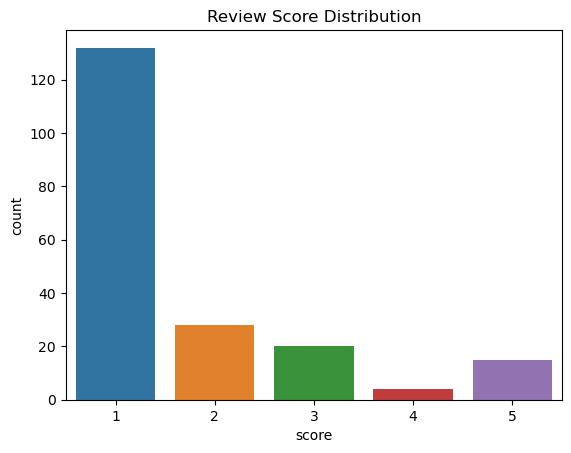

In [16]:
# Visualization of review score distribution
sns.countplot(x='score', data=data_x)
plt.title('Review Score Distribution')
plt.show()

In [38]:
# Count the number of reviews for each score
score_counts = data_x['score'].value_counts()

# Print the number of reviews for each score
print("Number of reviews for each score:")
for score, count in score_counts.items():
    print(f"Score {score}: {count} reviews")

Number of reviews for each score:
Score 1: 132 reviews
Score 2: 28 reviews
Score 3: 20 reviews
Score 5: 15 reviews
Score 4: 4 reviews


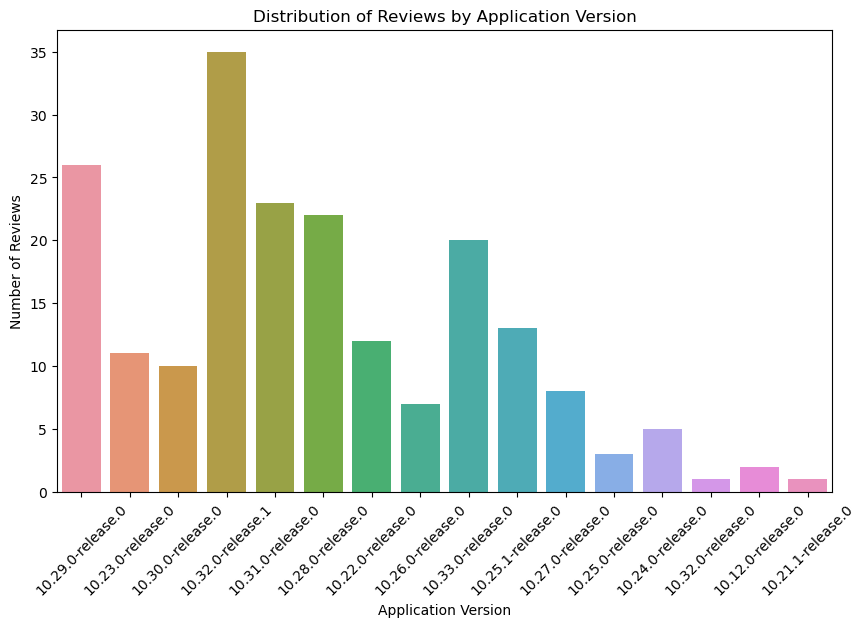

In [19]:
# Application version analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='appVersion', data=data_x)
plt.title('Distribution of Reviews by Application Version')
plt.xlabel('Application Version')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

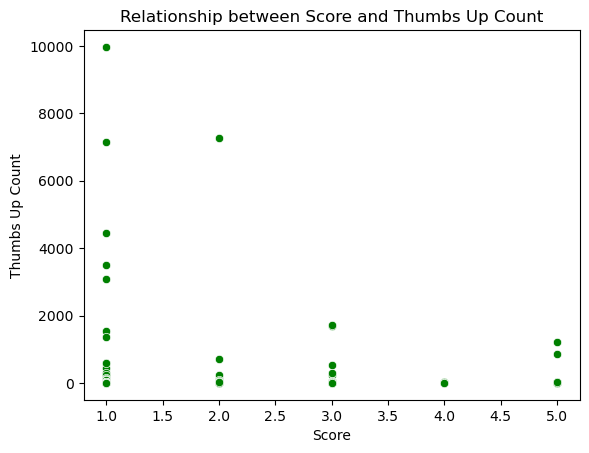

In [27]:
# Analysis of correlation between score and thumbsUpCount
sns.scatterplot(x='score', y='thumbsUpCount', data=data_x, color='green')
plt.title('Relationship between Score and Thumbs Up Count')
plt.xlabel('Score')
plt.ylabel('Thumbs Up Count')
plt.show()

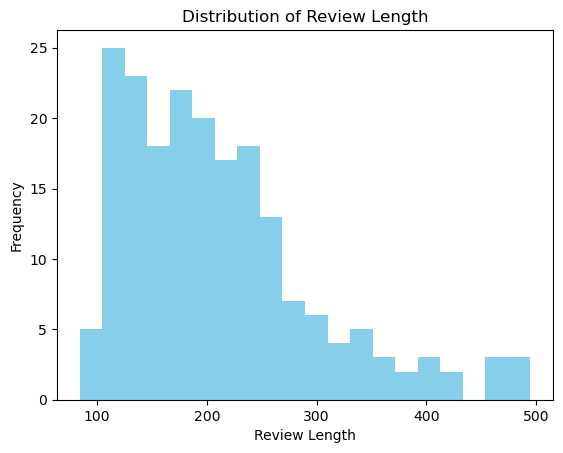

In [22]:
# Analysis of review length
data_x['content_length'] = data_x['content'].apply(len)
plt.hist(data_x['content_length'], bins=20, color='skyblue')  
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

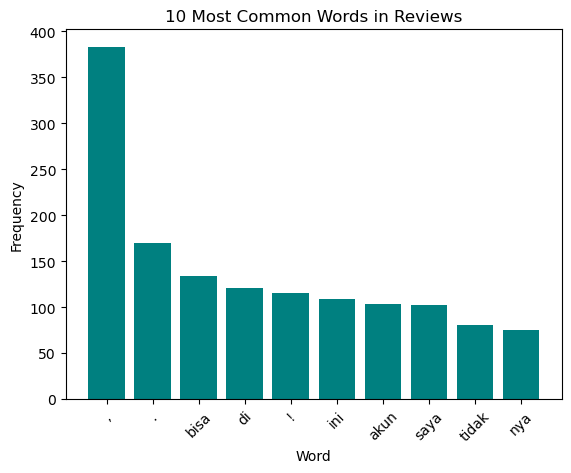

In [35]:
# Analysis of word trends
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenization of words
all_words = ' '.join(data_x['content'])
words = word_tokenize(all_words)

# Count the frequency of each word occurrence
word_freq = Counter(words)

# Get the most common words (for example, the first 10 words)
common_words = word_freq.most_common(10)

# Visualize the results
plt.bar(*zip(*common_words), color='Teal')
plt.title('10 Most Common Words in Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Get the most common words (for example, the first 10 words)
common_words = word_freq.most_common(10)

# Print the list of 10 most common words
print("List of 10 Most Common Words in Reviews:")
for word, freq in common_words:
    print(f"{word}: {freq} times")

List of 10 Most Common Words in Reviews:
,: 383 times
.: 170 times
bisa: 134 times
di: 121 times
!: 115 times
ini: 109 times
akun: 103 times
saya: 102 times
tidak: 81 times
nya: 75 times


In [30]:
# Filter data for each rating from 1 to 5
for rating in range(1, 6):
    # Filter data based on rating
    filtered_data = data_x[data_x['score'] == rating]
    
    # Group data based on review content
    grouped_data = filtered_data.groupby('content')
    
    # Calculate the number of upvotes for each review group
    upvote_counts = grouped_data['thumbsUpCount'].sum()
    
    # Identify the review with the highest number of upvotes
    max_upvote_index = upvote_counts.idxmax()
    max_upvote_count = upvote_counts[max_upvote_index]
    
    # Display the results
    print(f"Rating {rating}:")
    print(f"Review with the highest number of upvotes: {max_upvote_index}")
    print(f"Number of upvotes: {max_upvote_count}")
    print()

Rating 1:
Review with the highest number of upvotes: Makin kesini makin gak bener deh, makin lemot padahal jaringan bagus, lagi secroll tiba tiba keluar sendiri, klo mau save gambar susah banget, mau putar video lemot banget, dan berbagai keluhan lainnya, dulu sebelum di upgrade gak gini deh
Number of upvotes: 9969

Rating 2:
Review with the highest number of upvotes: Dulu apk ini sangat seru, dan cepat untuk di akses. Sekarang setelah di update terus menerus malah banyak berita atau akun² yang tidak di follow malah terus menerus muncul, dan itu sangat mengganggu sekali, bahkan sekarang lebih banyak iklan², aksesnya gambar/video sedikit lama. Asliii timeline jadi ga asik bgt buat di scroll karena malah jadi kebanyakan akun² yg sama sekali engga di follow sebelumnya👊🏻 please perbaikii!!!!
Number of upvotes: 7259

Rating 3:
Review with the highest number of upvotes: Apk nya bagus mudah untuk mendapatkan berita terkini, tapi kenapa yaa akhir akhir ini selalu loading bahkan postingan gamba

In [32]:
# Filter data for each rating from 1 to 5
for rating in range(1, 6):
    # Filter data based on rating
    filtered_data = data_x[data_x['score'] == rating]
    
    # Group data based on review content
    grouped_data = filtered_data.groupby('content')
    
    # Calculate the number of upvotes for each review group
    upvote_counts = grouped_data['thumbsUpCount'].sum()
    
    # Identify the review with the highest number of upvotes
    max_upvote_index = upvote_counts.idxmax()
    max_upvote_count = upvote_counts[max_upvote_index]
    
    # Identify the review ID
    max_upvote_review_id = filtered_data.loc[filtered_data['content'] == max_upvote_index, 'reviewId'].iloc[0]
    
    # Display the results
    print(f"Rating {rating}:")
    print(f"Review with the highest number of upvotes: {max_upvote_index}")
    print(f"Number of upvotes: {max_upvote_count}")
    print(f"Review ID: {max_upvote_review_id}")
    print()

Rating 1:
Review with the highest number of upvotes: Makin kesini makin gak bener deh, makin lemot padahal jaringan bagus, lagi secroll tiba tiba keluar sendiri, klo mau save gambar susah banget, mau putar video lemot banget, dan berbagai keluhan lainnya, dulu sebelum di upgrade gak gini deh
Number of upvotes: 9969
Review ID: 4e84a72a-fd74-4924-b159-18d4197a0074

Rating 2:
Review with the highest number of upvotes: Dulu apk ini sangat seru, dan cepat untuk di akses. Sekarang setelah di update terus menerus malah banyak berita atau akun² yang tidak di follow malah terus menerus muncul, dan itu sangat mengganggu sekali, bahkan sekarang lebih banyak iklan², aksesnya gambar/video sedikit lama. Asliii timeline jadi ga asik bgt buat di scroll karena malah jadi kebanyakan akun² yg sama sekali engga di follow sebelumnya👊🏻 please perbaikii!!!!
Number of upvotes: 7259
Review ID: 9c25353e-117f-4809-95a1-f0f4cb264e29

Rating 3:
Review with the highest number of upvotes: Apk nya bagus mudah untuk m